In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.api import VAR, DynamicVAR

In [2]:
root_dir = '/Users/kessapassa/OneDrive/research_log/20190104/3D/'

In [3]:
dir_list = ['people10000', 'people20000', 'people30000']
seed_list = [str(123 + i) for i in range(3)]
csv_list = ['census', 'mobile']

In [4]:
csv_array = {}
for _dir in dir_list:
    csv_array[_dir] = {}
    for _seed in seed_list:
        csv_array[_dir][_seed] = {}
        for _csv in csv_list:
            df = pd.read_csv(root_dir + _dir + 'seed' + _seed + '_' + _csv + '.csv',
                                                index_col=0,
                                                encoding='Shift_JISx0213')
            csv_array[_dir][_seed][_csv] = df

In [5]:
people = 'people30000'
seed = '123'
csv = 'mobile'

In [6]:
df = csv_array[people][seed][csv].copy()
model = VAR(df)
result = model.fit(2)
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 06, Jan, 2019
Time:                     13:40:24
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                    38.5334
Nobs:                     34.0000    HQIC:                   36.2259
Log likelihood:          -807.003    FPE:                2.09279e+15
AIC:                      35.0318    Det(Omega_mle):     2.99924e+14
--------------------------------------------------------------------
Results for equation 3600
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const           27.008158        26.547020            1.017           0.309
L1.3600          8.728802         5.494568            1.589           0.112
L1.7200        -19.300206         4.596295           -4.199           0.000
L1.10

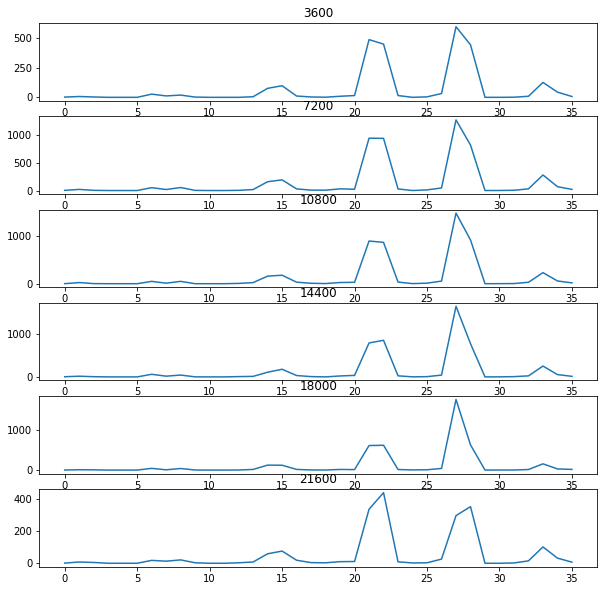

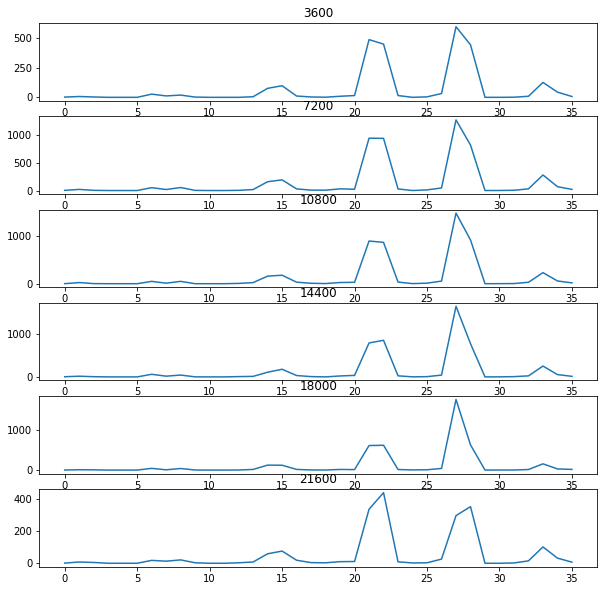

In [7]:
result.plot()

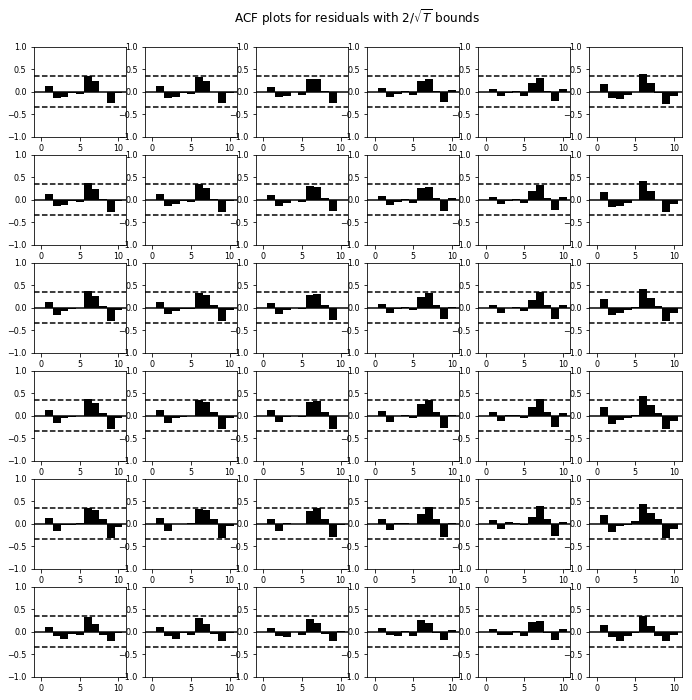

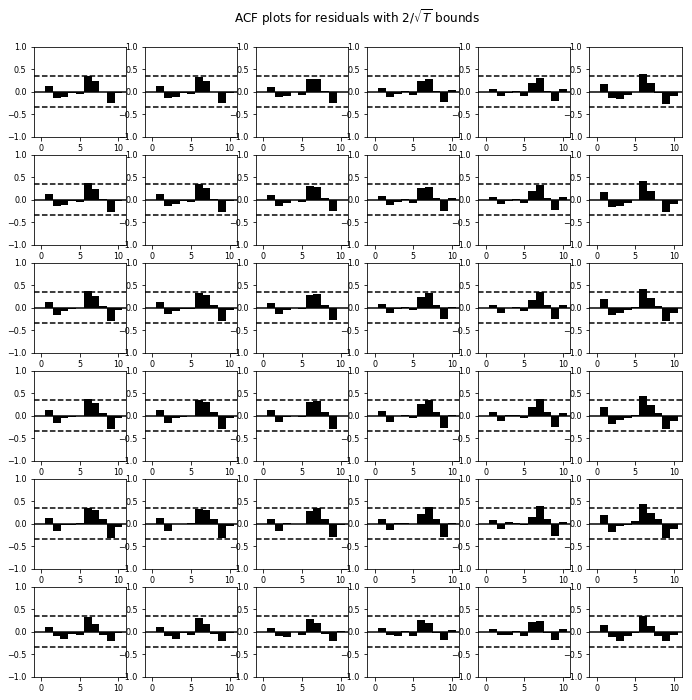

In [8]:
result.plot_acorr()

In [9]:
lag_order = result.k_ar
result.forecast(df.values[-lag_order:], 5)

array([[-201.07746334, -399.35608622, -419.0235972 , -416.4403206 ,
        -399.67670793, -111.85753222],
       [ -32.27967661,  -55.02196426,  -31.84638935,   -2.55536031,
          68.10887324,  -76.40323479],
       [ 200.1641512 ,  399.05404912,  407.80408714,  393.48940161,
         332.83527605,  156.89284788],
       [  90.2349018 ,  180.68680089,  188.94443138,  184.36768783,
         153.4875013 ,   70.89811065],
       [  10.76881846,   20.13674286,   22.26093693,   16.33368375,
           6.76793046,   13.75794377]])

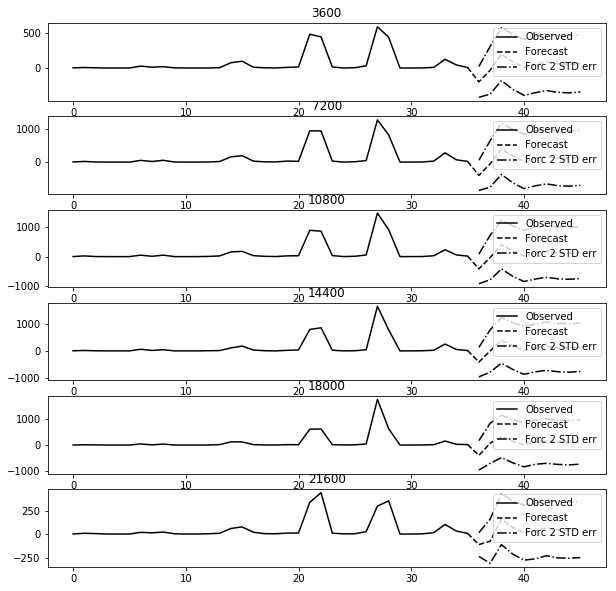

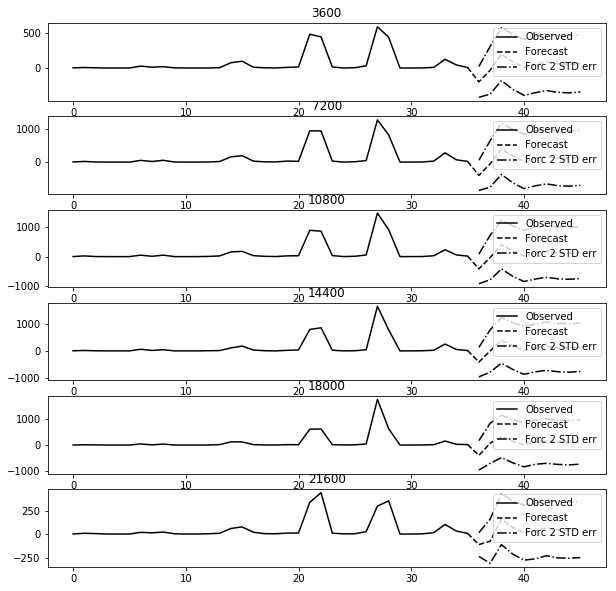

In [10]:
result.plot_forecast(10)

In [11]:
# import statsmodels.api as sm

# Y = df['21600']
# X = df.drop('21600', axis=1)

# # X = sm.add_constant(X)
# model = sm.OLS(Y, X)
# result = model.fit()
# result.summary()